In [1]:
import pandas as pd
import pm4py

In [32]:
dataframe = pd.read_csv('EventLog_ACME_TeachingCase.csv', sep=';')
dataframe = pm4py.format_dataframe(dataframe, case_id='CASE_ID', activity_key='ACTIVITY', timestamp_key='TIMESTAMP')
dataframe['SERVICEPOINT'] = dataframe['SERVICEPOINT'].astype(str)
event_log = pm4py.convert_to_event_log(dataframe)

In [45]:
dataframe

CASE_ID        ACTIVITY                 TIMESTAMP  REPAIR_IN_TIME_5D  \
0         Case10        Creation 2018-01-02 13:39:47+00:00                  0   
1         Case10          Letter 2018-01-05 00:00:00+00:00                  0   
2         Case10  DeviceReceived 2018-01-05 16:45:34+00:00                  0   
3         Case10      StockEntry 2018-01-17 00:00:00+00:00                  0   
4         Case10      InDelivery 2018-01-17 00:00:00+00:00                  0   
...          ...             ...                       ...                ...   
99227  Case29258      StockEntry 2019-03-05 00:00:00+00:00                  0   
99228  Case29258      InDelivery 2019-03-05 00:00:00+00:00                  0   
99229  Case29258   StatusRequest 2019-03-05 14:35:42+00:00                  0   
99230  Case29258    NoteWorkshop 2019-03-05 16:23:36+00:00                  0   
99231  Case29258       Completed 2019-03-05 16:42:46+00:00                  0   

      DEVICETYPE SERVICEPOINT case:concept:name    concept:name  \
0           AB52            E            Case10        Creation   
1           AB52            E            Case10          Letter   
2           AB52            E            Case10  DeviceReceived   
3           AB52            E            Case10      StockEntry   
4           AB52            E            Case10      InDelivery   
...          ...          ...               ...             ...   
99227       AB37            E         Case29258      StockEntry   
99228       AB37            E         Case29258      InDelivery   
99229       AB37            E         Case29258   StatusRequest   
99230       AB37            E         Case29258    NoteWorkshop   
99231       AB37            E         Case29258       Completed   

                 time:timestamp  @@index  @@case_index  
0     2018-01-02 13:39:47+00:00        0             0  
1     2018-01-05 00:00:00+00:00        1             0  
2     2018-01-05 16:45:34+00:00        2             0  
3     2018-01-17 00:00:00+00:00        3             0  
4     2018-01-17 00:00:00+00:00        4             0  
...                         ...      ...           ...  
99227 2019-03-05 00:00:00+00:00    99227         13274  
99228 2019-03-05 00:00:00+00:00    99228         13274  
99229 2019-03-05 14:35:42+00:00    99229         13274  
99230 2019-03-05 16:23:36+00:00    99230         13274  
99231 2019-03-05 16:42:46+00:00    99231         13274  

[99232 rows x 11 columns]

In [3]:
event_log

[{'attributes': {'concept:name': 'Case10'}, 'events': [{'CASE_ID': 'Case10', 'ACTIVITY': 'Creation', 'TIMESTAMP': Timestamp('2018-01-02 13:39:47+0000', tz='UTC'), 'REPAIR_IN_TIME_5D': 0, 'DEVICETYPE': 'AB52', 'SERVICEPOINT': 'E', 'concept:name': 'Creation', 'time:timestamp': Timestamp('2018-01-02 13:39:47+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'CASE_ID': 'Case10', 'ACTIVITY': 'Completed', 'TIMESTAMP': Timestamp('2018-01-17 09:34:32+0000', tz='UTC'), 'REPAIR_IN_TIME_5D': 0, 'DEVICETYPE': 'AB52', 'SERVICEPOINT': 'E', 'concept:name': 'Completed', 'time:timestamp': Timestamp('2018-01-17 09:34:32+0000', tz='UTC'), '@@index': 6, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': 'Case29258'}, 'events': [{'CASE_ID': 'Case29258', 'ACTIVITY': 'Creation', 'TIMESTAMP': Timestamp('2019-02-19 14:18:45+0000', tz='UTC'), 'REPAIR_IN_TIME_5D': 0, 'DEVICETYPE': 'AB37', 'SERVICEPOINT': 'E', 'concept:name': 'Creation', 'time:timestamp': Timestamp('2019-02-19 14:18:45+0000', 

List all traces

In [5]:
trace_list = list(event_log)
# trace_list = list(filter(lambda t: len(t) > 10, event_log))
#trace_list

In [6]:
total_traces = len(event_log)
total_traces

13275

Find traces with the most activities

In [7]:
largest_trace_length = max(len(trace) for trace in event_log)
print("Largest trace length:", largest_trace_length)

Largest trace length: 13


Discover start and end activities

In [10]:
from pm4py.statistics.start_activities.log.get import get_start_activities
from pm4py.statistics.end_activities.log.get import get_end_activities

log_start = get_start_activities(event_log)
end_activities = get_end_activities(event_log)
log_start

{'Creation': 12069,
 'Letter': 1041,
 'InDelivery': 13,
 'NoteHotline': 39,
 'StockEntry': 18,
 'DeviceReceived': 92,
 'Completed': 1,
 'Approved': 1,
 'NoteWorkshop': 1}

In [11]:
end_activities

{'Completed': 11815,
 'NoteHotline': 414,
 'InDelivery': 177,
 'NoteWorkshop': 763,
 'StockEntry': 18,
 'Letter': 68,
 'Approved': 8,
 'Transmission': 4,
 'DeviceReceived': 4,
 'StatusRequest': 4}

In [26]:
variants = pm4py.get_variants(event_log, activity_key='concept:name', case_id_key='CASE_ID', timestamp_key='TIMESTAMP')
print(f"We have:{len(variants)} variants in our log")

We have:1911 variants in our log


In [27]:
print(f"""The number of different activities in our dataset are: 
{pm4py.get_event_attribute_values(event_log, 'concept:name', case_id_key='CASE_ID')} 
""")

The number of different activities in our dataset are: 
{'Creation': 13275, 'Letter': 9093, 'DeviceReceived': 13275, 'StockEntry': 4778, 'InDelivery': 13275, 'NoteWorkshop': 8891, 'Completed': 13273, 'NoteHotline': 10068, 'StatusRequest': 2504, 'Transmission': 5312, 'Approved': 5480, 'FreeticketCust': 2, 'FreeticketComp': 6} 



In [22]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(event_log, "concept:name")
activities

{'Creation': 13275,
 'Letter': 9093,
 'DeviceReceived': 13275,
 'StockEntry': 4778,
 'InDelivery': 13275,
 'NoteWorkshop': 8891,
 'Completed': 13273,
 'NoteHotline': 10068,
 'StatusRequest': 2504,
 'Transmission': 5312,
 'Approved': 5480,
 'FreeticketCust': 2,
 'FreeticketComp': 6}

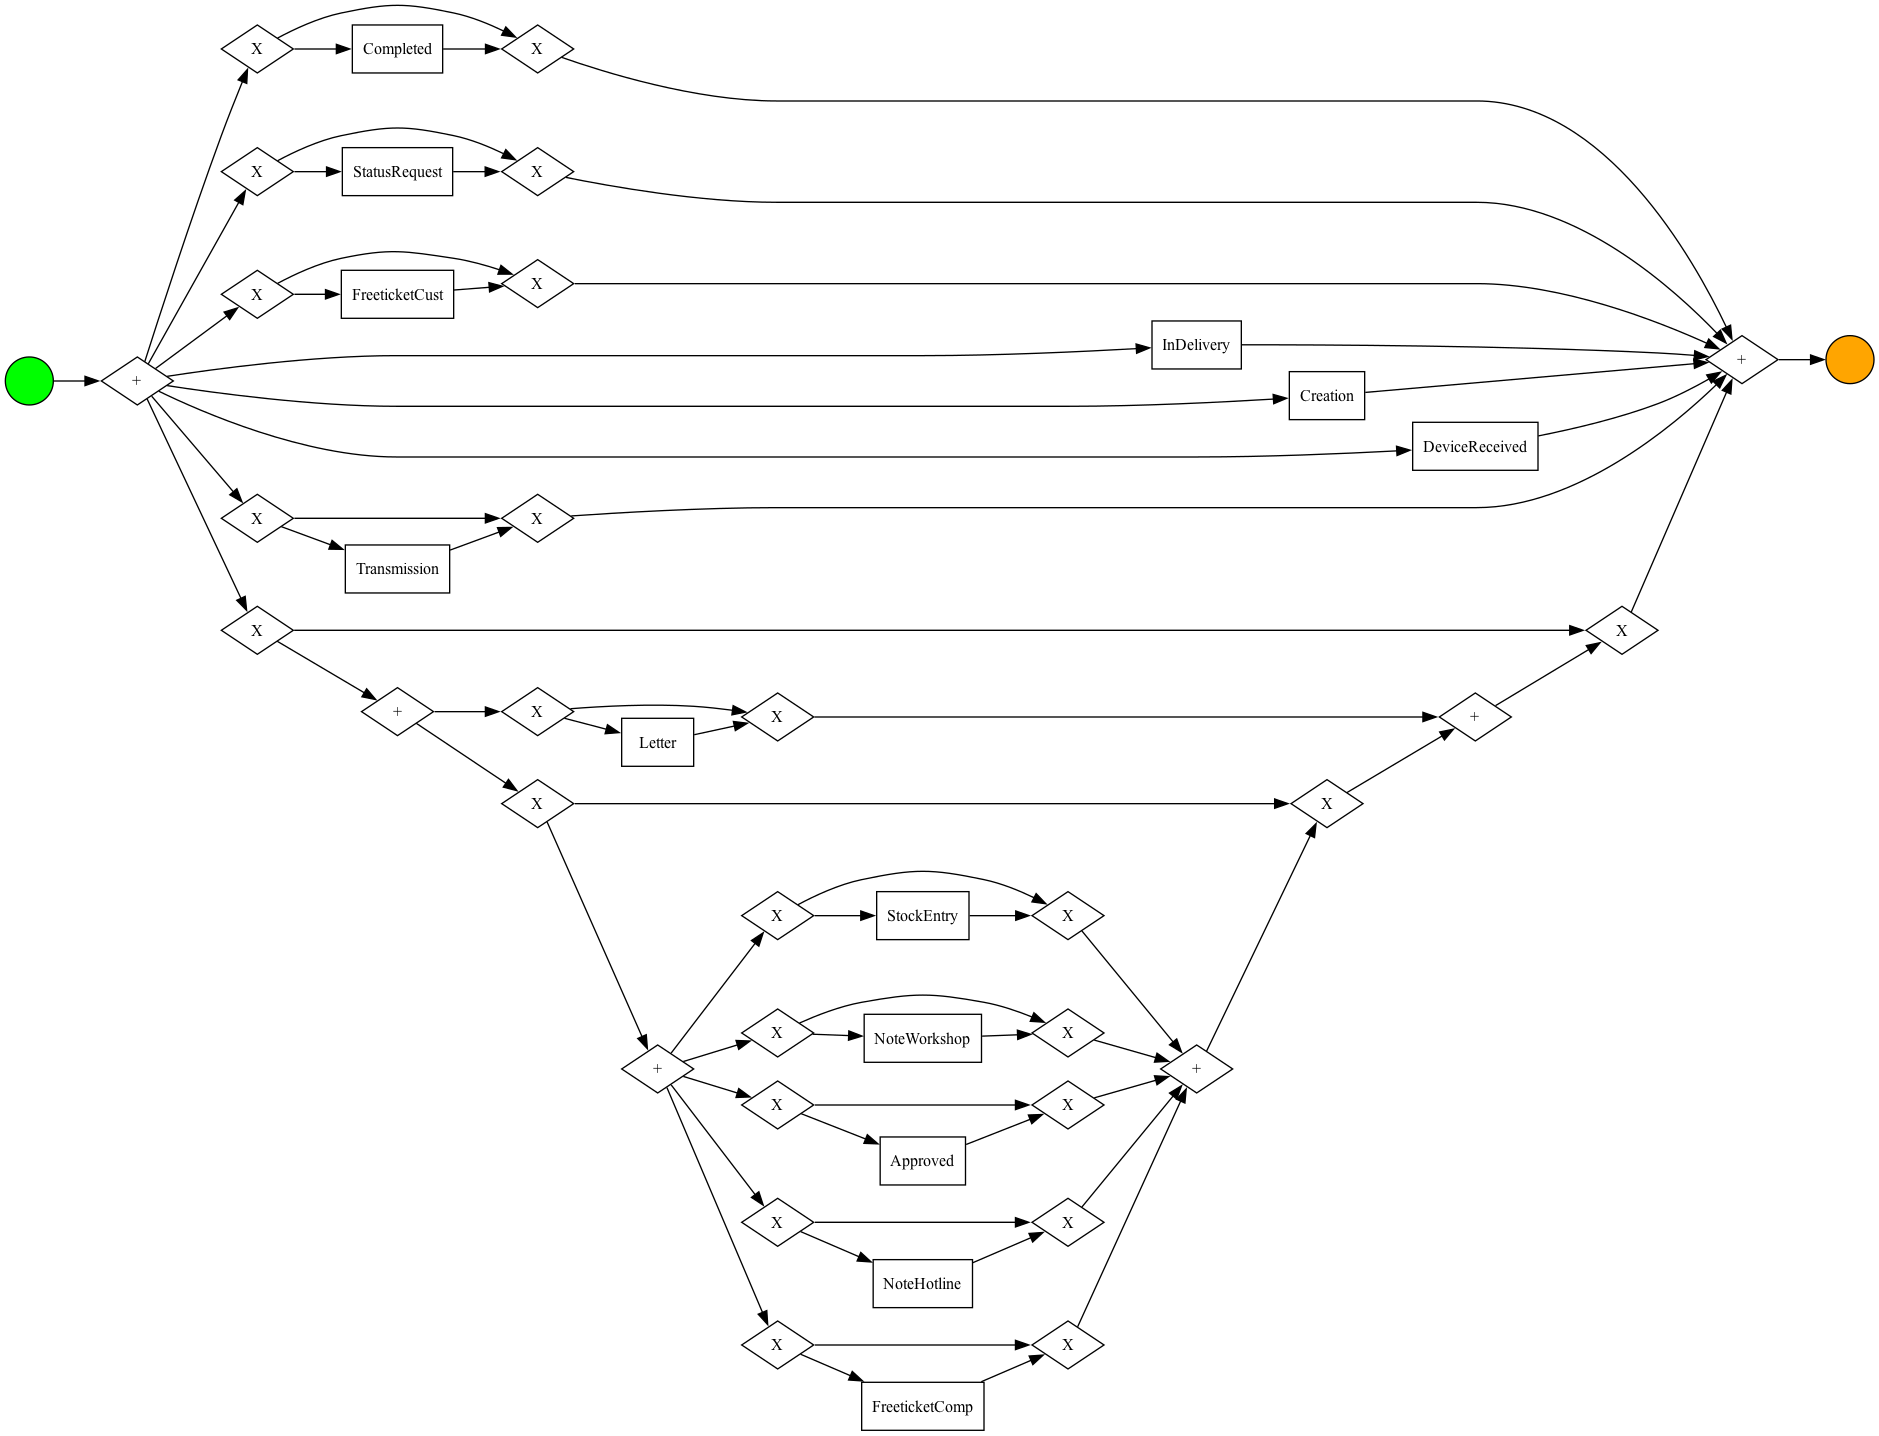

In [12]:
bpmn_graph = pm4py.discover_bpmn_inductive(dataframe, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_bpmn(bpmn_graph)

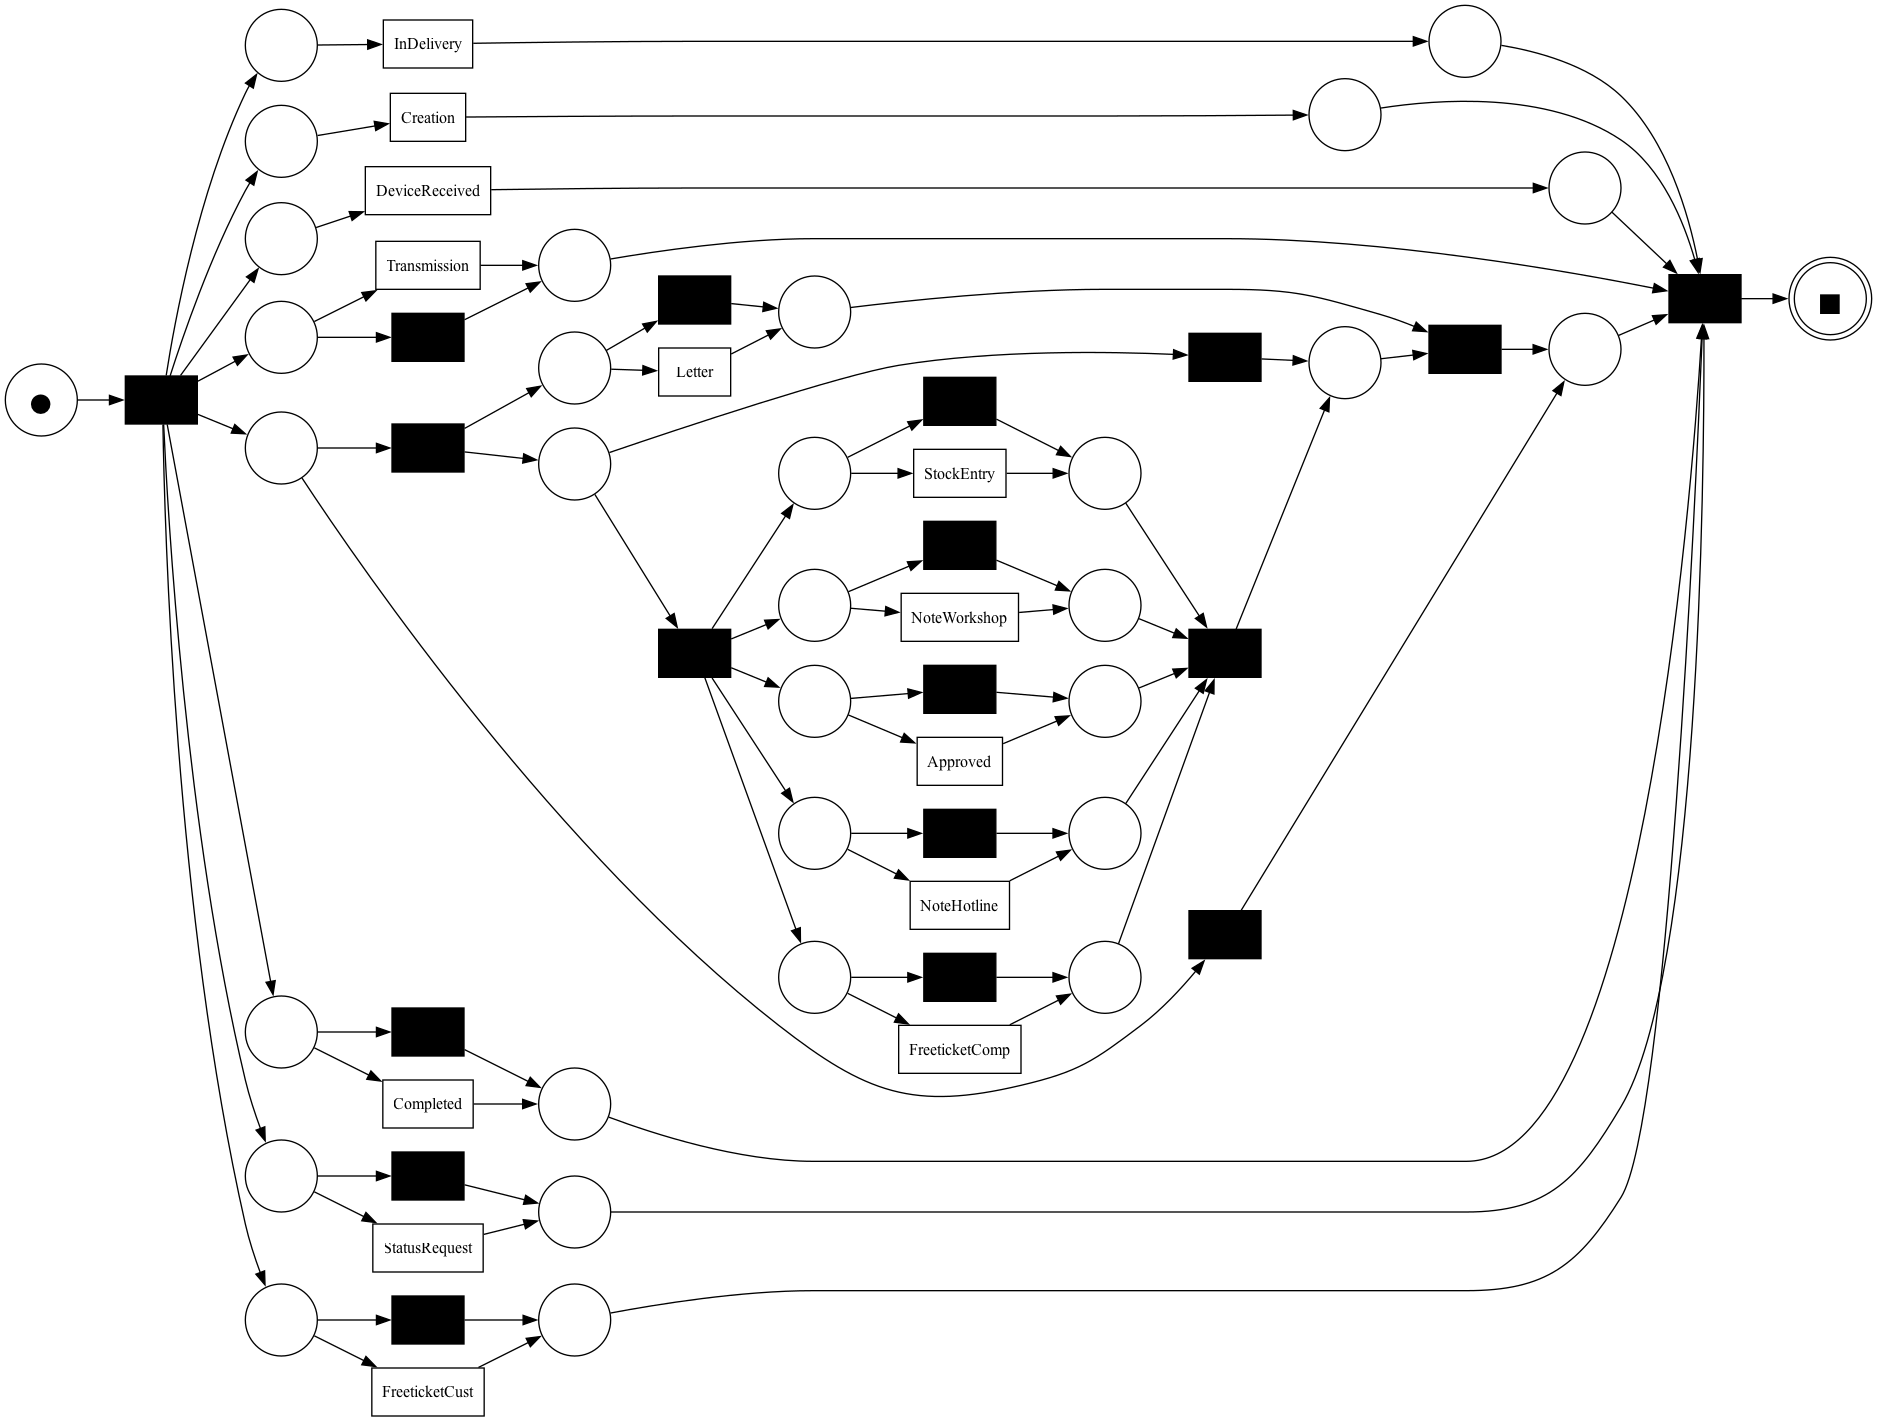

In [13]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, initial_marking, final_marking, format="png")

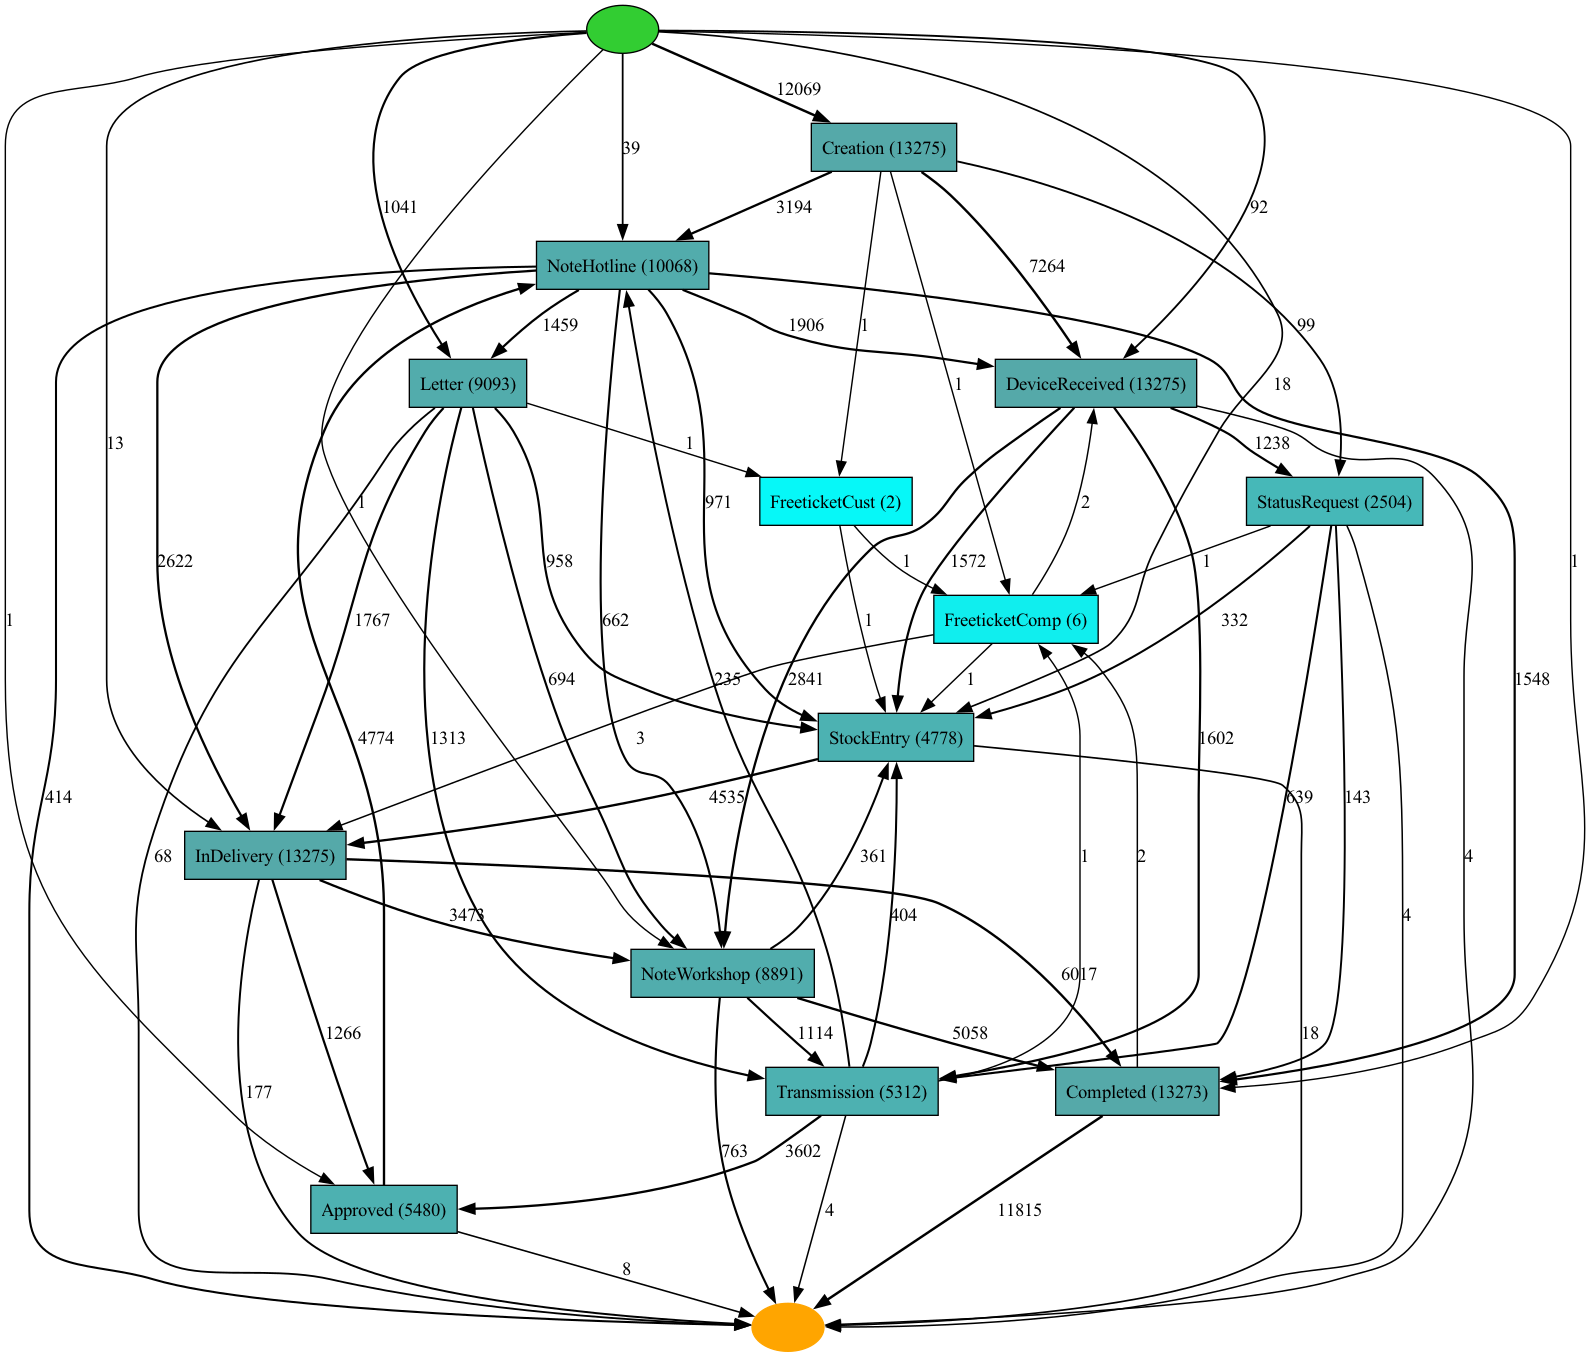

In [14]:
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

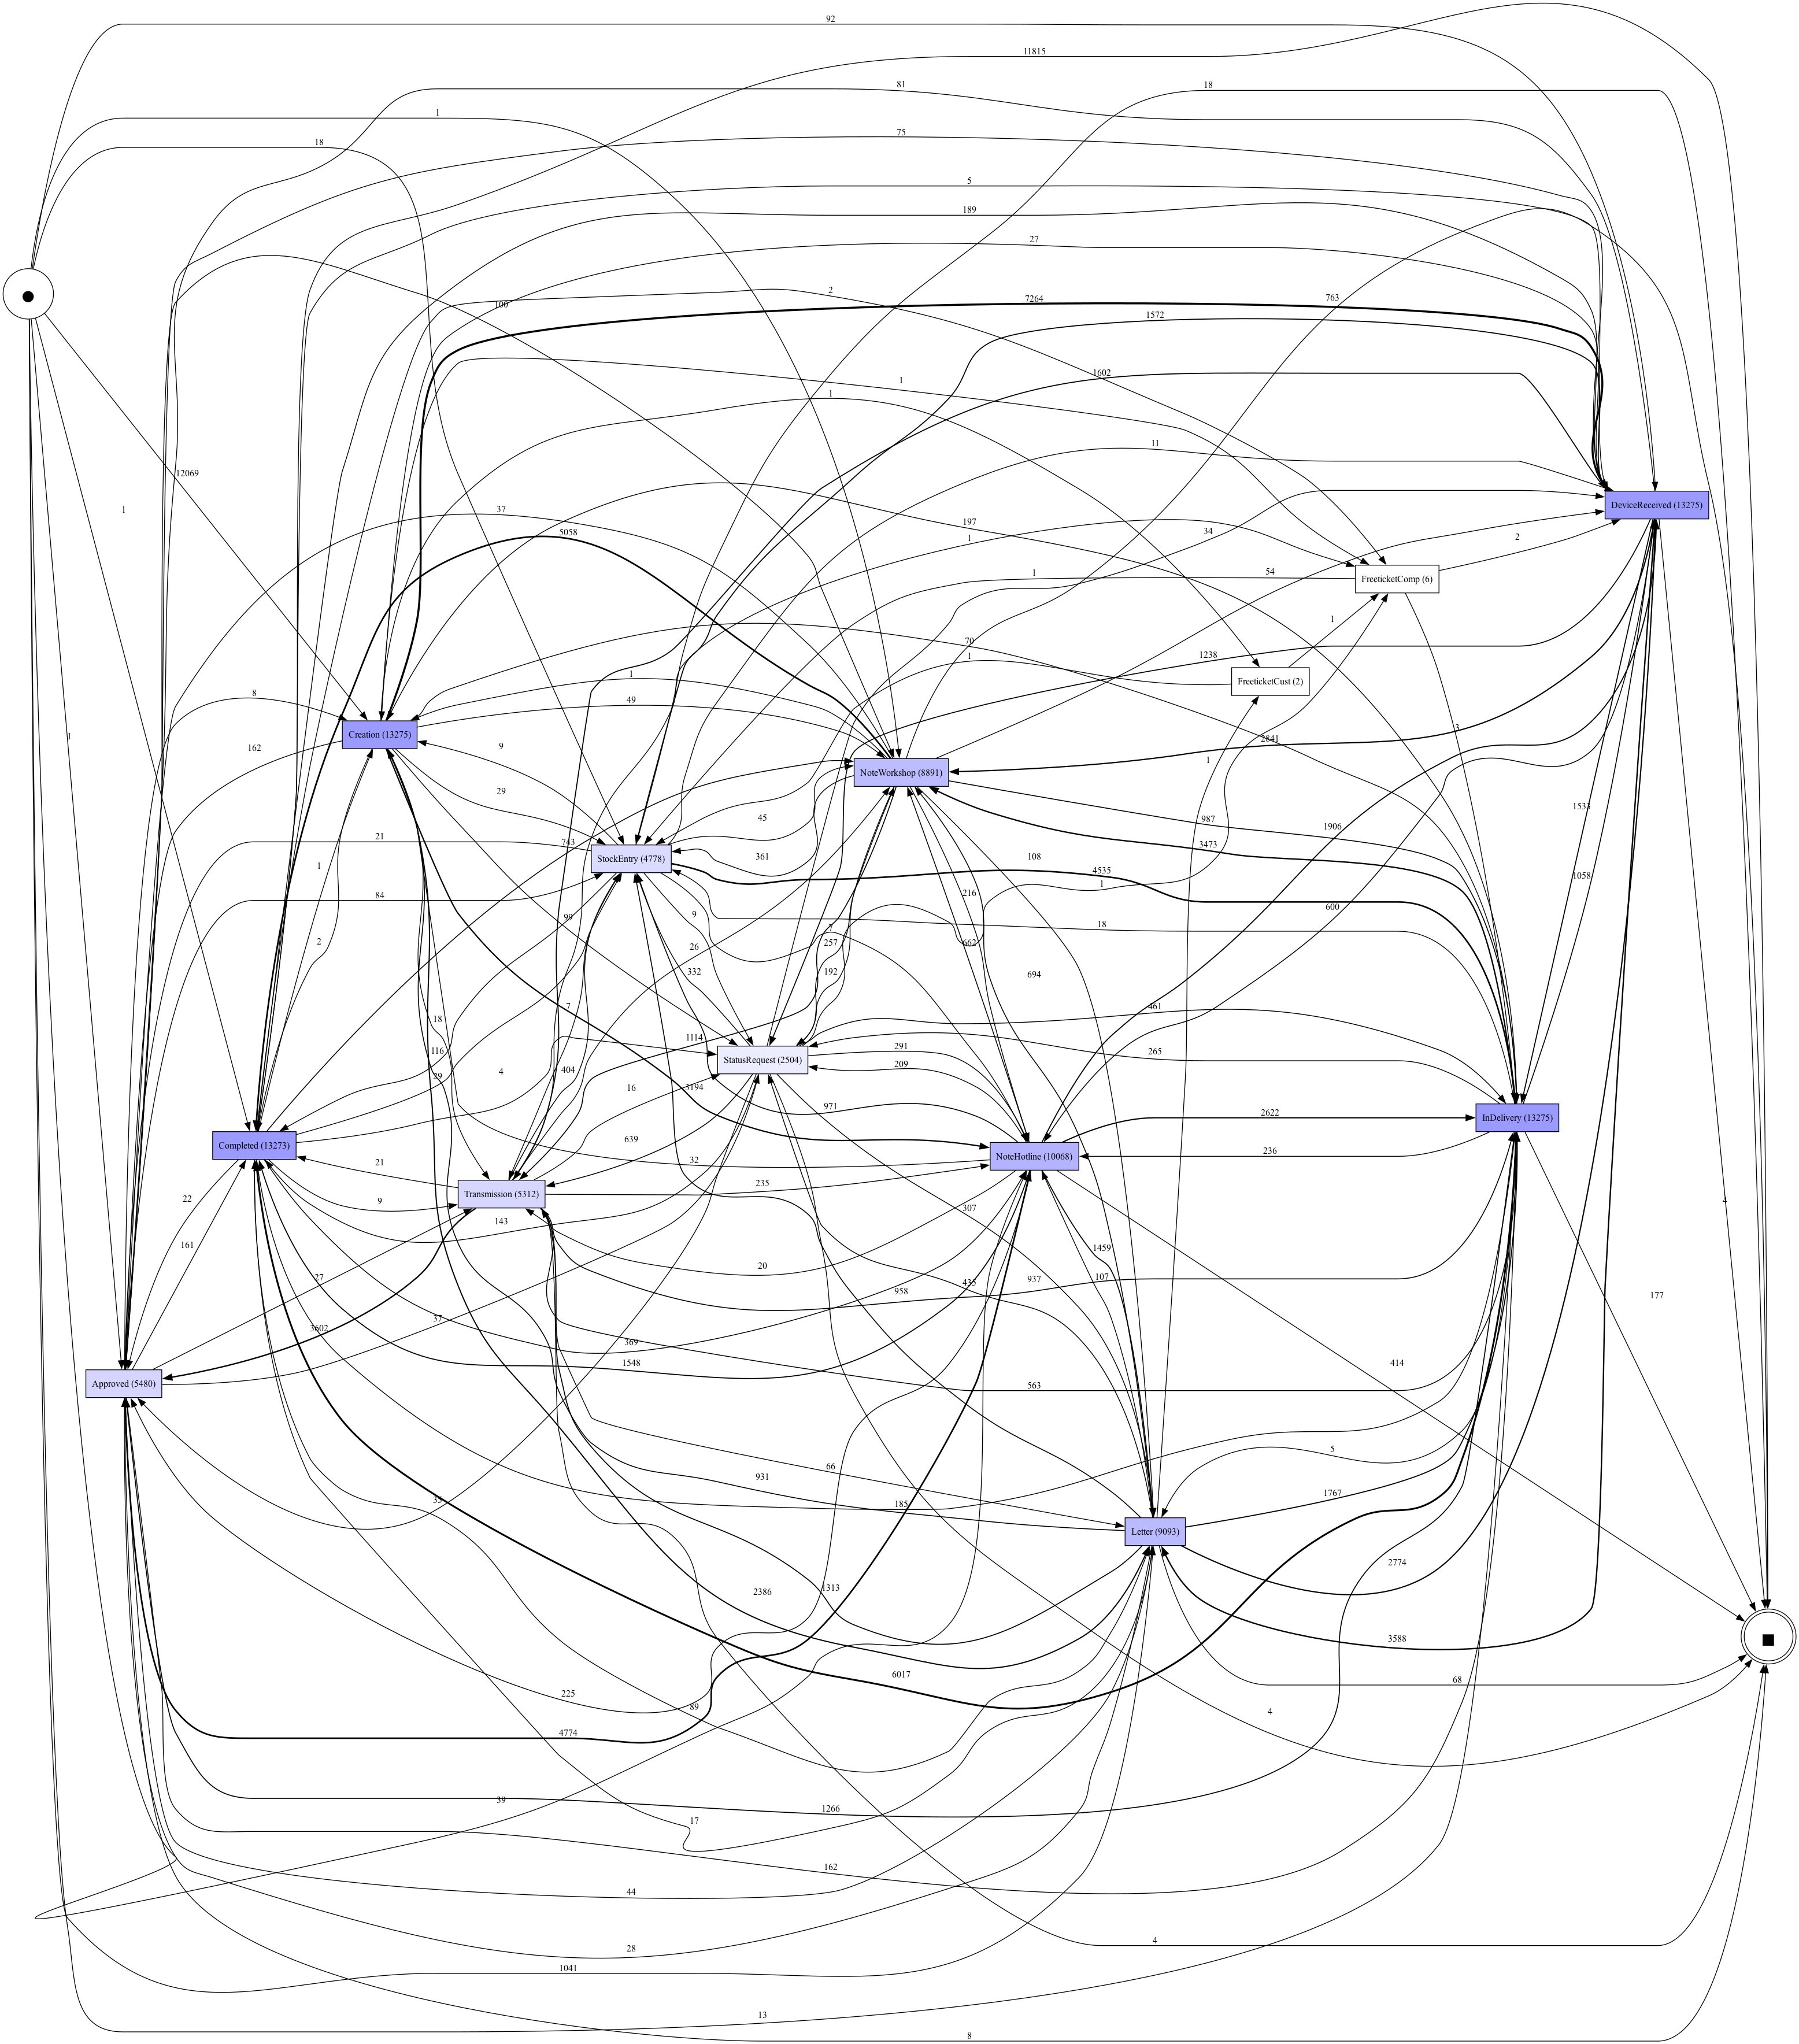

In [15]:
dfg, start_activities, end_activities = pm4py.discover_dfg(dataframe, case_id_key='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
pm4py.view_dfg(dfg, start_activities, end_activities, format='png')

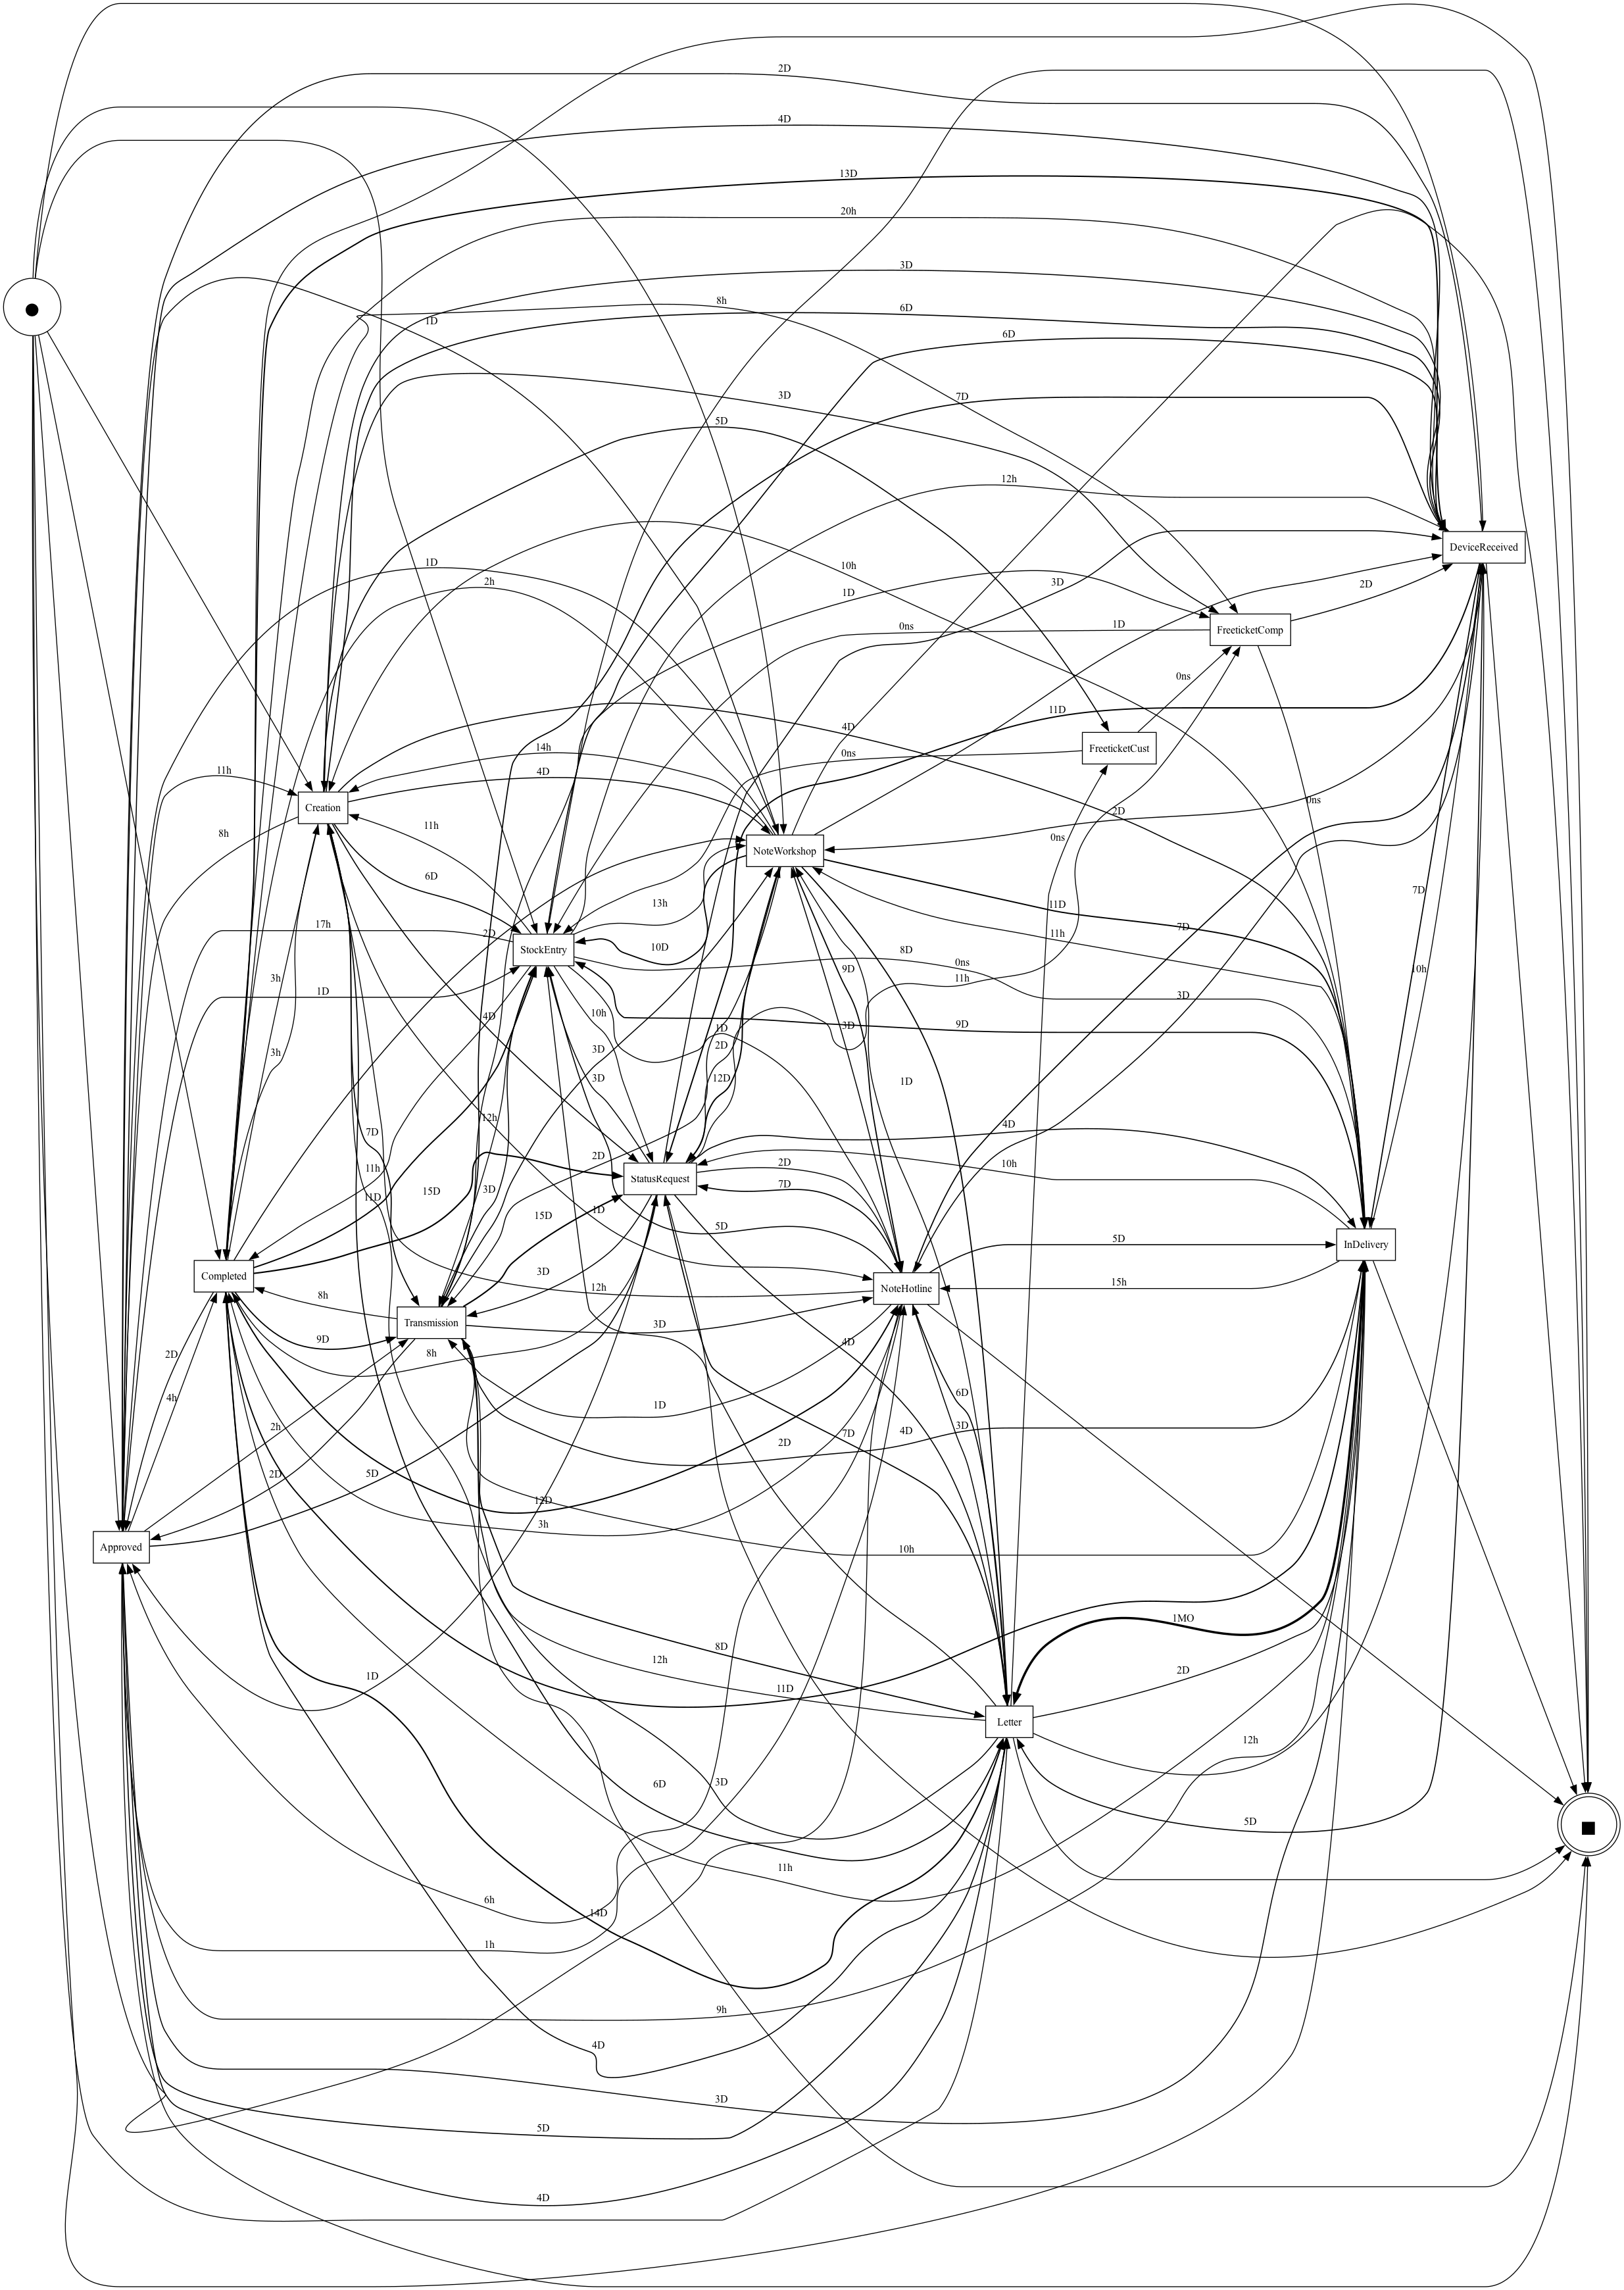

In [23]:
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(dataframe, case_id_key='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')
pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities, format='png')

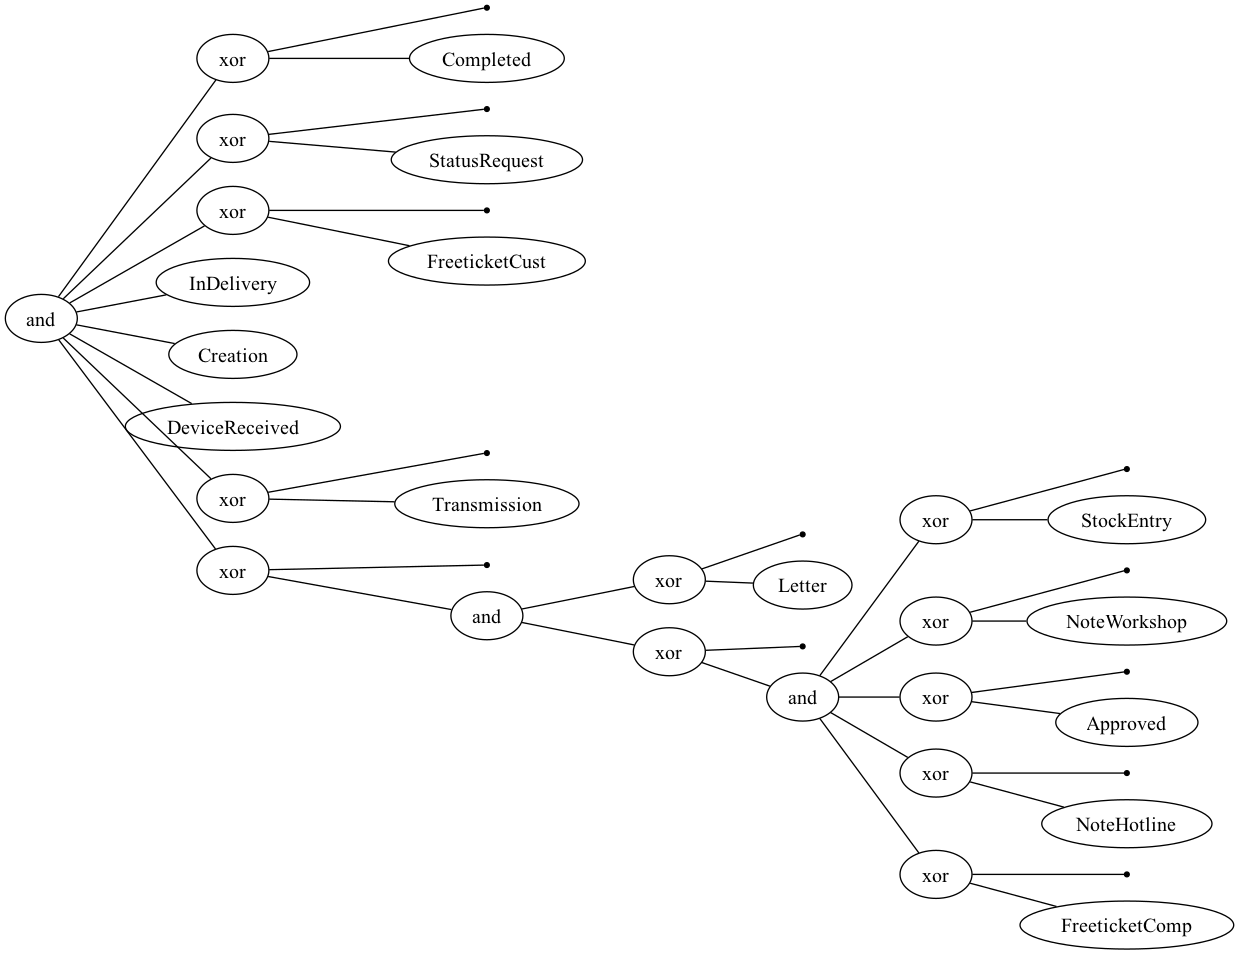

In [16]:
process_tree = pm4py.discover_process_tree_inductive(dataframe, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_process_tree(process_tree, format='png')

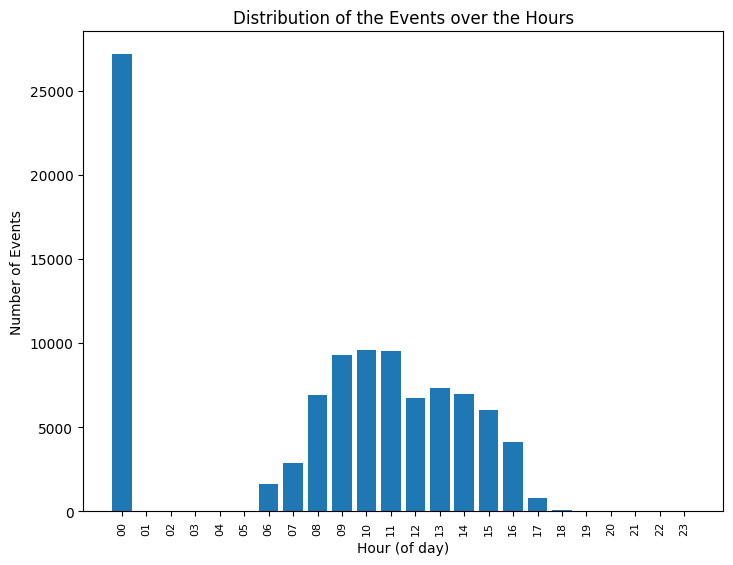

In [40]:
pm4py.view_events_distribution_graph(dataframe, format='png', distr_type='hours', activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

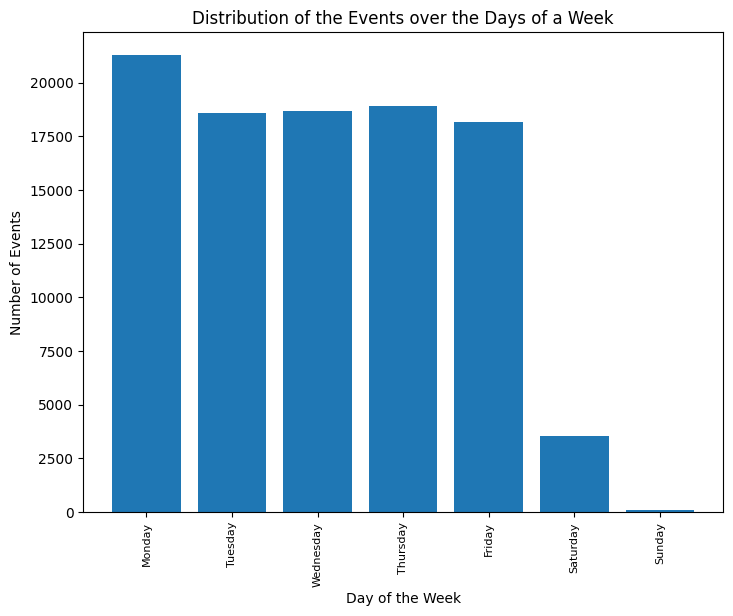

In [17]:
pm4py.view_events_distribution_graph(dataframe, format='png', distr_type='days_week', activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

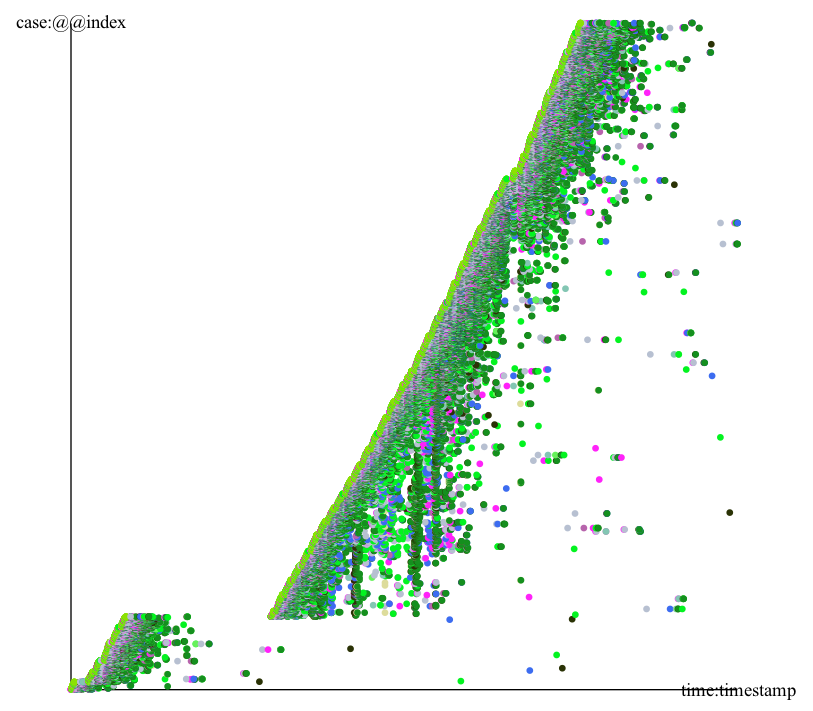

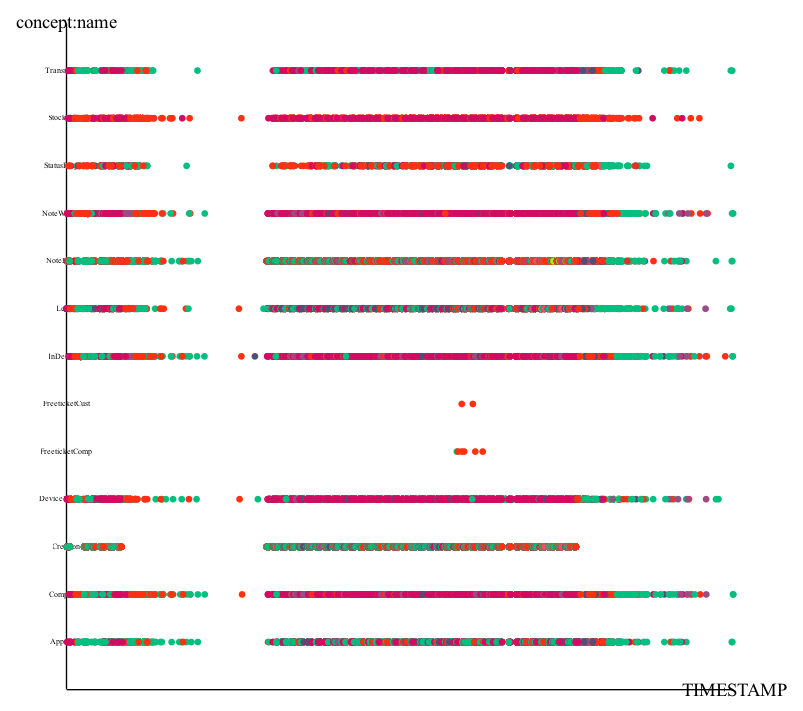

In [33]:
pm4py.view_dotted_chart(event_log, show_legend=False)
pm4py.view_dotted_chart(event_log, attributes=['TIMESTAMP', 'concept:name', 'SERVICEPOINT'], show_legend=False) 

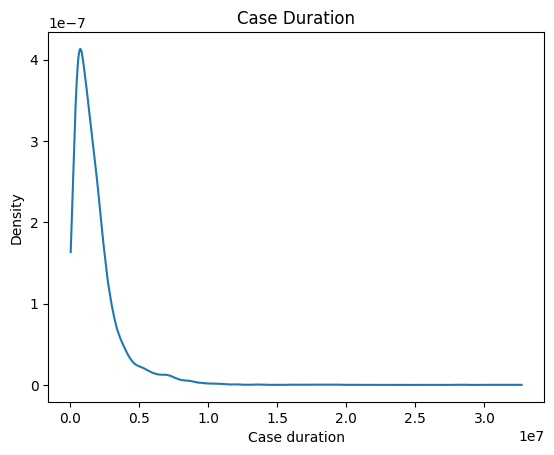

In [38]:
pm4py.view_case_duration_graph(event_log, activity_key= 'concept:name', case_id_key='CASE_ID', timestamp_key='TIMESTAMP')

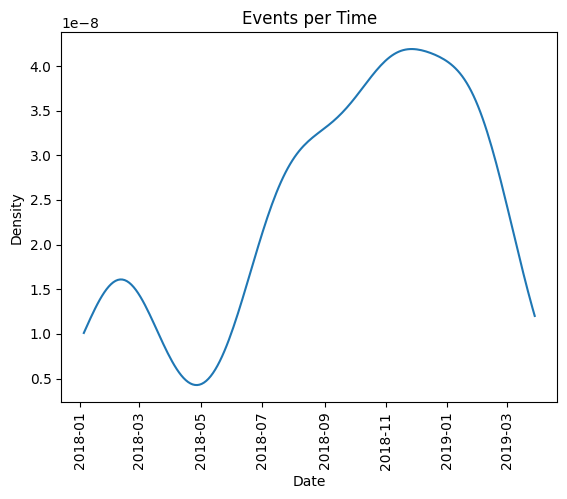

In [39]:
pm4py.view_events_per_time_graph(event_log, activity_key= 'concept:name', case_id_key='CASE_ID', timestamp_key='TIMESTAMP')